<a href="https://colab.research.google.com/github/sgr1118/NLP_basic/blob/main/_4_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 문서 유사도 측정

* 문서와 문서 간의 유사도 비교를 위해 유클리드 거리, 자카드 유사도 그리고 코사인 유사도 계산

In [2]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
d1 = 'Thank like a man of action and act like man of thought.'
d2 = 'Try no to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, of give me death'

corpus = [d1, d2, d3]
print(corpus)

['Thank like a man of action and act like man of thought.', 'Try no to become a man of success but rather try to become a man of value.', 'Give me liberty, of give me death']


In [4]:
import pandas as pd

vector = CountVectorizer(stop_words = 'english')
bow = vector.fit_transform(corpus)

columns = []
for k, v in sorted(vector.vocabulary_.items(), key = lambda item:item[1]):
    columns.append(k)

df = pd.DataFrame(bow.toarray(),columns = columns)
df

,act,action,death,liberty,like,man,success,thank,thought,try,value
0,1,1,0,0,2,2,0,1,1,0,0
1,0,0,0,0,0,2,1,0,0,2,1
2,0,0,1,1,0,0,0,0,0,0,0


### 유클리드 거리(Euclidean distance)

* 다차원 공간에서 두개의 점 $p$와 $q$ 사이의 거리를 계산하는 방법

$$ \sqrt{\sum_{i=1}^{n}\left (q_i - p_i \right)^2} $$


In [7]:
import numpy as np

def euclidean_distance(p, q):
    return np.sqrt(np.sum((q-p)**2))

In [9]:
print(euclidean_distance(bow[0].toarray(), bow[1].toarray()))
print(euclidean_distance(bow[0].toarray(), bow[2].toarray()))
print(euclidean_distance(bow[1].toarray(), bow[2].toarray()))

3.7416573867739413
3.7416573867739413
3.4641016151377544


### 자카드 유사도(Jaccard Similarity)

* 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용

$$ jaccard(A, B)=\frac{\left | A\cap B \right |}{\left | A\cup B \right |}=\frac{\left | A\cap B \right |}{\left | A \left |+ \right | B \right | - \left | A\cap B \right |} $$


In [11]:
from nltk.corpus.reader.ycoe import wordpunct_tokenize
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()

    words1 = [lemmatizer.lemmatize(word.lower()) for word in wordpunct_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in wordpunct_tokenize(d2)]

    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))

    return inter/union

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


### 코사인 유사도(Cosine Similarity)

* 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

$$ cosine(A, B)=\frac{A \cdot B}{\left \| A \right \| \left \| B \right \|}=\frac{\sum_{i=1}^{N}A_i\times B_i}{\sqrt{\sum_{i=1}^{N}\left (A_i \right)^2}\times \sqrt{\sum_{i=1}^{N}\left (B_i \right)^2}} $$

In [15]:
tfidf = TfidfVectorizer()

tfidf_vectors = tfidf.fit_transform(corpus)

print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[1]))
print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[2]))
print(cosine_similarity(tfidf_vectors[1], tfidf_vectors[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 군집화(Clustering)

* 리뷰 데이터 다운로드 (http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip)

In [16]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip

--2023-01-25 04:53:15--  http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773840 (756K) [application/x-httpd-php]
Saving to: ‘OpinosisDataset1.0.zip’

OpinosisDataset1.0. 100%[===================>] 755.70K  4.42MB/s    in 0.2s    

2023-01-25 04:53:15 (4.42 MB/s) - ‘OpinosisDataset1.0.zip’ saved [773840/773840]



In [17]:
!unzip OpinosisDataset1.0.zip

Archive:  OpinosisDataset1.0.zip
   creating: OpinosisDataset1.0/examples/
   creating: OpinosisDataset1.0/examples/prepare4rouge/
   creating: OpinosisDataset1.0/examples/prepare4rouge/input/
   creating: OpinosisDataset1.0/examples/prepare4rouge/input/summaries-base/
  inflating: OpinosisDataset1.0/examples/prepare4rouge/input/summaries-base/accuracy_garmin_nuvi_255W_gps.baseline  
  inflating: OpinosisDataset1.0/examples/prepare4rouge/input/summaries-base/bathroom_bestwestern_hotel_sfo.baseline  
   creating: OpinosisDataset1.0/examples/prepare4rouge/input/summaries-gold/
   creating: OpinosisDataset1.0/examples/prepare4rouge/input/summaries-gold/accuracy_garmin_nuvi_255W_gps/
  inflating: OpinosisDataset1.0/examples/prepare4rouge/input/summaries-gold/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.1.gold  
  inflating: OpinosisDataset1.0/examples/prepare4rouge/input/summaries-gold/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.2.gold  
 extracting: Opinosis

In [19]:
!ls OpinosisDataset1.0/topics

accuracy_garmin_nuvi_255W_gps.txt.data
bathroom_bestwestern_hotel_sfo.txt.data
battery-life_amazon_kindle.txt.data
battery-life_ipod_nano_8gb.txt.data
battery-life_netbook_1005ha.txt.data
buttons_amazon_kindle.txt.data
comfort_honda_accord_2008.txt.data
comfort_toyota_camry_2007.txt.data
directions_garmin_nuvi_255W_gps.txt.data
display_garmin_nuvi_255W_gps.txt.data
eyesight-issues_amazon_kindle.txt.data
features_windows7.txt.data
fonts_amazon_kindle.txt.data
food_holiday_inn_london.txt.data
food_swissotel_chicago.txt.data
free_bestwestern_hotel_sfo.txt.data
gas_mileage_toyota_camry_2007.txt.data
interior_honda_accord_2008.txt.data
interior_toyota_camry_2007.txt.data
keyboard_netbook_1005ha.txt.data
location_bestwestern_hotel_sfo.txt.data
location_holiday_inn_london.txt.data
mileage_honda_accord_2008.txt.data
navigation_amazon_kindle.txt.data
parking_bestwestern_hotel_sfo.txt.data
performance_honda_accord_2008.txt.data
performance_netbook_1005ha.txt.data
price_amazon_kindle.txt.data
pri

In [ ]:
import glob, os

path = r'./OpinosisDataset1.0/topics/'
files = glob.glob(os.path.join(path, '*data'))
filenames = []
opinions = []

for file_ in files:
    filename = file_.split('/')[-1]
    filename = filename.split('.')[0]
    filenames.append(filename)

    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    opinions.append(df.to_string())

opinion_df = pd.DataFrame({'filename':filenames, 'opinion': opinions})
opinion_df

In [26]:
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), min_df = 0.05, max_df = 0.85)

tfidf_vectors = tfidf.fit_transform(opinion_df['opinion'])
feature_name = tfidf.get_feature_names_out()
print(feature_name)

['00' '000' '000 miles' ... 'yes rooms' 'yields' 'zoom']


### DBSCAN 알고리즘

* 밀도 기반의 군집화 알고리즘
* 특정 벡터부터 시작해 반경내 기준치 만큼의 점들이 존재한다면 군집화 하는 방식
* 일정 밀도 이상의 데이터를 기준으로 군집을 형성하기 때문에 노이즈 처리에 용이
* 이미 형성된 군집 기준으로 기준점을 옮겨가며 처리하기 때문에 분포가 이상한 데이터에도 강건함
* K-means에 비해 속도가 느리고, 파라미터 값인 epsilon, min_sampels 값에 영향을 많이 받음

In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.7, min_samples = 3, metric = 'cosine')
dbscan_label = dbscan.fit_predict(tfidf_vectors)
print(dbscan_label)

[ 0 -1  0 -1  1 -1 -1  0  2  3  0  3  1  0  3  0 -1  3 -1  0 -1  3  0 -1
 -1 -1 -1  1  0  3  1 -1  2  3  3  3  3 -1  3  2  1  3 -1  3 -1  2 -1 -1
 -1 -1  2]


In [32]:
opinion_df['cluster'] = dbscan_label
opinion_df

,filename,opinion,cluster
0,video_ipod_nano_8gb,...,0
1,mileage_honda_accord_2008,...,-1
2,size_asus_netbook_1005ha,...,0
3,gas_mileage_toyota_camry_2007,...,-1
4,battery-life_ipod_nano_8gb,...,1
5,staff_bestwestern_hotel_sfo,...,-1
6,parking_bestwestern_hotel_sfo,...,-1
7,display_garmin_nuvi_255W_gps,...,0
8,comfort_toyota_camry_2007,...,2
9,service_swissotel_hotel_chicago,...,3


In [34]:
for cluster_num in set(dbscan_label):
    print('Clustr: {}'.format(cluster_num))
    df = opinion_df[opinion_df['cluster'] == cluster_num]
    for filename in df['filename']:
        print(filename)
    print()

Clustr: 0
video_ipod_nano_8gb
size_asus_netbook_1005ha
display_garmin_nuvi_255W_gps
screen_netbook_1005ha
screen_garmin_nuvi_255W_gps
speed_garmin_nuvi_255W_gps
screen_ipod_nano_8gb
keyboard_netbook_1005ha
voice_garmin_nuvi_255W_gps

Clustr: 1
battery-life_ipod_nano_8gb
battery-life_amazon_kindle
performance_honda_accord_2008
battery-life_netbook_1005ha
performance_netbook_1005ha

Clustr: 2
comfort_toyota_camry_2007
interior_toyota_camry_2007
seats_honda_accord_2008
interior_honda_accord_2008
comfort_honda_accord_2008

Clustr: 3
service_swissotel_hotel_chicago
price_amazon_kindle
bathroom_bestwestern_hotel_sfo
food_holiday_inn_london
price_holiday_inn_london
service_bestwestern_hotel_sfo
food_swissotel_chicago
location_bestwestern_hotel_sfo
rooms_bestwestern_hotel_sfo
room_holiday_inn_london
service_holiday_inn_london
rooms_swissotel_chicago
location_holiday_inn_london

Clustr: -1
mileage_honda_accord_2008
gas_mileage_toyota_camry_2007
staff_bestwestern_hotel_sfo
parking_bestwestern_ho

### K-means 알고리즘

* 대표적인 군집화 알고리즘
* 클러스터 수 k를 직접 지정해야 함
* 각 군집내 평균 벡터와 해당 군집에 속한 벡터간의 거리 제곱의 합이 최소가 되는 군집을 찾는 방법
* 노이즈 데이터에 취약하고, 중심점(centroid)을 임의로 잡기 때문에 군집 결과가 상이하거나 나쁠수 있음

In [50]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, max_iter = 10000, random_state = 42)
kmeans_label = kmeans.fit_predict(tfidf_vectors)
kmeans_centers = kmeans.cluster_centers_

print(kmeans_label) # 3가지 레이블이 생성됨
pd.DataFrame(kmeans_centers) # 4400개 컬럼이 3개의 군집으로 묶여있다.

[2 0 2 0 2 1 1 2 0 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 2 1 0 2 1 2 2 0 1 1 1 1
 2 1 0 2 1 2 1 2 0 0 2 0 2 0]


,0,1,2,3,4,5,6,7,8,9,...,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399
0,0.000932,0.007161,0.00486,0.003372,0.003252,0.004269,0.007004,0.000000,0.000000,0.000000,...,0.004123,0.002509,0.005445,0.000000,0.000000,0.002379,0.001887,0.000000,0.002924,0.000000
1,0.004467,0.000000,0.00000,0.000000,0.000195,0.000000,0.000000,0.000857,0.001729,0.000000,...,0.001365,0.001024,0.002556,0.000865,0.000700,0.000951,0.003261,0.001657,0.000000,0.000000
2,0.001304,0.000000,0.00000,0.000000,0.000000,0.000551,0.000000,0.000000,0.000000,0.003177,...,0.005709,0.003491,0.005241,0.002440,0.001774,0.000000,0.002975,0.000000,0.000411,0.007339


In [51]:
opinion_df['cluster'] = kmeans_label
opinion_df

,filename,opinion,cluster,x0,x1
0,video_ipod_nano_8gb,...,2,-0.152046,-0.071213
1,mileage_honda_accord_2008,...,0,-0.100784,0.437898
2,size_asus_netbook_1005ha,...,2,-0.290990,-0.257771
3,gas_mileage_toyota_camry_2007,...,0,-0.103847,0.454087
4,battery-life_ipod_nano_8gb,...,2,-0.388819,-0.408436
5,staff_bestwestern_hotel_sfo,...,1,0.397774,-0.082764
6,parking_bestwestern_hotel_sfo,...,1,0.108532,0.014762
7,display_garmin_nuvi_255W_gps,...,2,-0.162306,-0.056499
8,comfort_toyota_camry_2007,...,0,-0.098934,0.631259
9,service_swissotel_hotel_chicago,...,1,0.617913,-0.148295


In [52]:
for cluster_num in set(kmeans_label):
    print('Clustr: {}'.format(cluster_num))
    df = opinion_df[opinion_df['cluster'] == cluster_num]
    for filename in df['filename']:
        print(filename)
    print() # 3개 클러스터만 생성

Clustr: 0
mileage_honda_accord_2008
gas_mileage_toyota_camry_2007
comfort_toyota_camry_2007
performance_honda_accord_2008
interior_toyota_camry_2007
seats_honda_accord_2008
interior_honda_accord_2008
transmission_toyota_camry_2007
quality_toyota_camry_2007
comfort_honda_accord_2008

Clustr: 1
staff_bestwestern_hotel_sfo
parking_bestwestern_hotel_sfo
service_swissotel_hotel_chicago
bathroom_bestwestern_hotel_sfo
food_holiday_inn_london
price_holiday_inn_london
free_bestwestern_hotel_sfo
staff_swissotel_chicago
service_bestwestern_hotel_sfo
food_swissotel_chicago
location_bestwestern_hotel_sfo
rooms_bestwestern_hotel_sfo
room_holiday_inn_london
service_holiday_inn_london
rooms_swissotel_chicago
location_holiday_inn_london

Clustr: 2
video_ipod_nano_8gb
size_asus_netbook_1005ha
battery-life_ipod_nano_8gb
display_garmin_nuvi_255W_gps
screen_netbook_1005ha
price_amazon_kindle
battery-life_amazon_kindle
screen_garmin_nuvi_255W_gps
speed_garmin_nuvi_255W_gps
satellite_garmin_nuvi_255W_gps
eye

In [53]:
# 클러스터의 중심점에 어떤 단어가 있는지 추출


centroid_feature = kmeans_centers.argsort()[:, ::-1] 

for cluster_num in set(kmeans_label):
    print('Cluster: {}'.format(cluster_num))

    df = opinion_df[opinion_df['cluster'] == cluster_num]
    print(df['filename'].tolist())

    top_feature_indexes = centroid_feature[cluster_num, :10]
    top_features = [feature_name[i] for i in top_feature_indexes]
    print(top_features)

    top_feature_values = kmeans_centers[cluster_num, top_feature_indexes].tolist()
    print(top_feature_values)
    print()

Cluster: 0
['mileage_honda_accord_2008', 'gas_mileage_toyota_camry_2007', 'comfort_toyota_camry_2007', 'performance_honda_accord_2008', 'interior_toyota_camry_2007', 'seats_honda_accord_2008', 'interior_honda_accord_2008', 'transmission_toyota_camry_2007', 'quality_toyota_camry_2007', 'comfort_honda_accord_2008']
['interior', 'mileage', 'seats', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
[0.22940662594074898, 0.17810810374886255, 0.15792798571547909, 0.1334206321602722, 0.12346144832942062, 0.11718826616085697, 0.10603040749397602, 0.10094449706344982, 0.09746055601174283, 0.09321139024541651]

Cluster: 1
['staff_bestwestern_hotel_sfo', 'parking_bestwestern_hotel_sfo', 'service_swissotel_hotel_chicago', 'bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'price_holiday_inn_london', 'free_bestwestern_hotel_sfo', 'staff_swissotel_chicago', 'service_bestwestern_hotel_sfo', 'food_swissotel_chicago', 'location_bestwestern_hotel_sfo', 'room

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state = 42)
pca_vecs = pca.fit_transform(tfidf_vectors.toarray())
opinion_df['x0'] = pca_vecs[:, 0]
opinion_df['x1'] = pca_vecs[:, 1]

cluster_map = {0:'Car', 1: 'Accommodation', 2: 'Electronic devices'}
opinion_df['cluster'] = opinion_df['cluster'].map(cluster_map)
opinion_df

,filename,opinion,cluster,x0,x1
0,video_ipod_nano_8gb,...,Electronic devices,-0.152046,-0.071213
1,mileage_honda_accord_2008,...,Car,-0.100784,0.437898
2,size_asus_netbook_1005ha,...,Electronic devices,-0.290990,-0.257771
3,gas_mileage_toyota_camry_2007,...,Car,-0.103847,0.454087
4,battery-life_ipod_nano_8gb,...,Electronic devices,-0.388819,-0.408436
5,staff_bestwestern_hotel_sfo,...,Accommodation,0.397774,-0.082764
6,parking_bestwestern_hotel_sfo,...,Accommodation,0.108532,0.014762
7,display_garmin_nuvi_255W_gps,...,Electronic devices,-0.162306,-0.056499
8,comfort_toyota_camry_2007,...,Car,-0.098934,0.631259
9,service_swissotel_hotel_chicago,...,Accommodation,0.617913,-0.148295


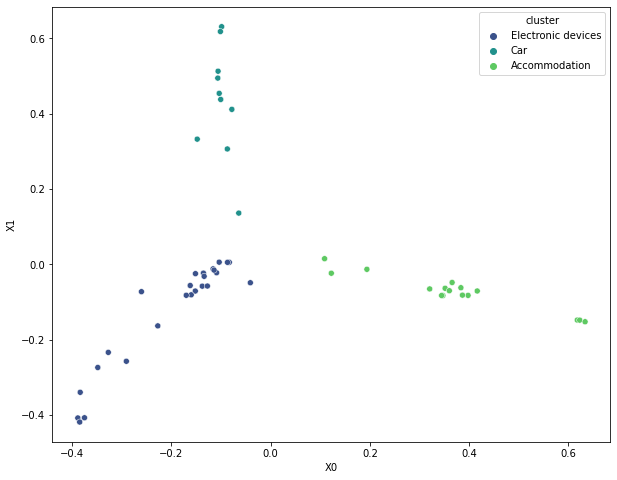

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.xlabel('X0')
plt.ylabel('X1')
sns.scatterplot(data=opinion_df, x = 'x0', y = 'x1', hue='cluster', palette = 'viridis')
plt.show()

### 리뷰 문서 유사도 측정

In [58]:
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), min_df = 0.05, max_df = 0.85)
tfidf_vectors = tfidf.fit_transform(opinion_df['opinion'])

word_id_list = sorted(tfidf.vocabulary_.items(), key = lambda x: x[1], reverse = False)
word_list = [x[0] for x in word_id_list]

tf_idf_df = pd.DataFrame(tfidf_vectors.toarray(),
                         columns = word_list,
                         index = opinion_df['filename'])

tf_idf_df

,00,000,000 miles,05,06,07,08,10 did,10 great,10 inch,...,year,year old,years,years ago,years old,yellow,yes,yes rooms,yields,zoom
filename,,,,,,,,,,,,,,,,,,,,,
video_ipod_nano_8gb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014481,0.007305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mileage_honda_accord_2008,0.000000,0.000000,0.000000,0.012400,0.011624,0.005812,0.005812,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
size_asus_netbook_1005ha,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020658,...,0.000000,0.000000,0.020550,0.000000,0.019365,0.000000,0.012625,0.000000,0.000000,0.000000
gas_mileage_toyota_camry_2007,0.000000,0.008217,0.008691,0.000000,0.008691,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005086,0.000000,0.004612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
battery-life_ipod_nano_8gb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016666,0.021020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
staff_bestwestern_hotel_sfo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004224,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
parking_bestwestern_hotel_sfo,0.008842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
display_garmin_nuvi_255W_gps,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074584
comfort_toyota_camry_2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.025884,0.000000,0.000000,0.000000,0.010601,0.000000,0.017346,0.000000


In [59]:
cos_sim_df = pd.DataFrame(cosine_similarity(tf_idf_df, tf_idf_df),
                          columns = opinion_df['filename'],
                          index = opinion_df['filename'])
cos_sim_df

filename,video_ipod_nano_8gb,mileage_honda_accord_2008,size_asus_netbook_1005ha,gas_mileage_toyota_camry_2007,battery-life_ipod_nano_8gb,staff_bestwestern_hotel_sfo,parking_bestwestern_hotel_sfo,display_garmin_nuvi_255W_gps,comfort_toyota_camry_2007,service_swissotel_hotel_chicago,...,rooms_swissotel_chicago,sound_ipod_nano_8gb,location_holiday_inn_london,directions_garmin_nuvi_255W_gps,interior_honda_accord_2008,transmission_toyota_camry_2007,speed_windows7,quality_toyota_camry_2007,fonts_amazon_kindle,comfort_honda_accord_2008
filename,,,,,,,,,,,,,,,,,,,,,
video_ipod_nano_8gb,1.000000,0.006083,0.049090,0.005719,0.165513,0.006152,0.005602,0.016573,0.015133,0.010959,...,0.010246,0.291318,0.010762,0.020527,0.015818,0.008953,0.033821,0.054100,0.018218,0.020555
mileage_honda_accord_2008,0.006083,1.000000,0.016216,0.967277,0.005406,0.005746,0.017632,0.014209,0.243226,0.014244,...,0.008625,0.013912,0.008751,0.018409,0.041034,0.066062,0.013859,0.095984,0.005991,0.171982
size_asus_netbook_1005ha,0.049090,0.016216,1.000000,0.017029,0.230289,0.016254,0.021856,0.069802,0.052914,0.029002,...,0.020162,0.057577,0.021707,0.034066,0.017760,0.016935,0.087494,0.017481,0.156597,0.065020
gas_mileage_toyota_camry_2007,0.005719,0.967277,0.017029,1.000000,0.005736,0.005640,0.015050,0.011693,0.278058,0.013708,...,0.008045,0.013721,0.009536,0.016959,0.053951,0.081947,0.010895,0.144125,0.005088,0.166655
battery-life_ipod_nano_8gb,0.165513,0.005406,0.230289,0.005736,1.000000,0.004098,0.006671,0.020480,0.015535,0.010898,...,0.007854,0.202738,0.009623,0.022931,0.010890,0.011012,0.024695,0.033660,0.013261,0.016610
staff_bestwestern_hotel_sfo,0.006152,0.005746,0.016254,0.005640,0.004098,1.000000,0.072941,0.021503,0.029652,0.222797,...,0.184335,0.006870,0.165492,0.025900,0.010972,0.005746,0.016241,0.007332,0.007173,0.029925
parking_bestwestern_hotel_sfo,0.005602,0.017632,0.021856,0.015050,0.006671,0.072941,1.000000,0.012729,0.041578,0.099226,...,0.069384,0.007358,0.069396,0.014455,0.015832,0.012118,0.008206,0.021452,0.006930,0.035526
display_garmin_nuvi_255W_gps,0.016573,0.014209,0.069802,0.011693,0.020480,0.021503,0.012729,1.000000,0.019442,0.015141,...,0.013405,0.041921,0.023805,0.142169,0.014811,0.023077,0.022519,0.013897,0.075161,0.020953
comfort_toyota_camry_2007,0.015133,0.243226,0.052914,0.278058,0.015535,0.029652,0.041578,0.019442,1.000000,0.041881,...,0.052076,0.037846,0.034675,0.027721,0.290231,0.076110,0.026563,0.220592,0.011551,0.832797


In [72]:
hotel_indexes = opinion_df[opinion_df['cluster'] == 'Accommodation'].index
print(hotel_indexes)

hotel_file_name = opinion_df.iloc[hotel_indexes[0]]['filename']
print(hotel_file_name)

similarity = cosine_similarity(tfidf_vectors[hotel_indexes[0]], tfidf_vectors[hotel_indexes])
print(similarity)

Int64Index([5, 6, 9, 14, 17, 21, 24, 26, 29, 33, 34, 35, 36, 38, 41, 43], dtype='int64')
staff_bestwestern_hotel_sfo
[[1.         0.07294137 0.22279693 0.08793586 0.11222105 0.14206942
  0.13521413 0.94146158 0.2769479  0.07560249 0.24171769 0.25789364
  0.20378816 0.21211888 0.18433476 0.16549177]]


In [74]:
sorted_index = similarity.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:] # 0번째를 제외하고 첫번째부터 불러오기

print(sorted_index)

hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]
print(hotel_sorted_indexes)

hotel_1_similarity = np.sqrt(similarity.reshape(-1))[::-1]
hotel_1_similarity = hotel_1_similarity[1:]
print(hotel_1_similarity)

[[ 7  8 11 10  2 13 12 14 15  5  6  4  3  9  1]]
Int64Index([26, 29, 35, 34, 9, 38, 36, 41, 43, 21, 24, 17, 14, 33, 6], dtype='int64')
[0.42934224 0.46056365 0.45142902 0.50783229 0.49164793 0.27495908
 0.5262584  0.97028943 0.36771474 0.37692097 0.3349941  0.29653982
 0.4720137  0.2700766  1.        ]


In [75]:
df = pd.DataFrame({'similarity':hotel_1_similarity},
                  index = opinion_df.iloc[hotel_sorted_indexes]['filename'])
df

,similarity
filename,
staff_swissotel_chicago,0.429342
service_bestwestern_hotel_sfo,0.460564
rooms_bestwestern_hotel_sfo,0.451429
location_bestwestern_hotel_sfo,0.507832
service_swissotel_hotel_chicago,0.491648
service_holiday_inn_london,0.274959
room_holiday_inn_london,0.526258
rooms_swissotel_chicago,0.970289
location_holiday_inn_london,0.367715


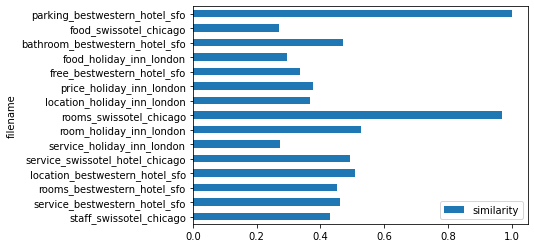

In [79]:
df.plot.barh()

## 계층적 군집화(Hierarchical Clustering)

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### 병합 군집화(Agglomerative Clustering)

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지(ward, average, complete)를 지정 가능

`ward`: 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)

`average`: 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침

`complete`: 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

### 덴드로그램(Dendrogram)

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

* 각 단어간 코사인 유사도를 이용한 군집 분석 및 덴드로그램 시각화

## 뉴스그룹 군집 분석

### 데이터 로드 및 전처리

### K-means 군집화

### 병합 군집화